In [1]:
# import thư viên
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
# read data
path = "E:/DataExample/covid19-provinces_vn_vi.csv"
df =  pd.read_csv(path, encoding='UTF-16', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HASC           63 non-null     object 
 1   ISO            63 non-null     object 
 2   FIPS           63 non-null     object 
 3   Mã hành chính  63 non-null     int64  
 4   Tỉnh           63 non-null     object 
 5   Số ca nhiễm    63 non-null     int64  
 6   Đang điều trị  63 non-null     int64  
 7   Bình phục      63 non-null     int64  
 8   Tử vong        63 non-null     int64  
 9   Unnamed: 9     0 non-null      float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.0+ KB


In [52]:
# loại bỏ 1 cột có giá trị null
df_covid = df.drop(df.columns[9], axis = 'columns' )
df_covid.reset_index(drop=True, inplace=True)
df_covid.head()

,HASC,ISO,FIPS,Mã hành chính,Tỉnh,Số ca nhiễm,Đang điều trị,Bình phục,Tử vong
0,VN.HI,HN,VM44,1,Hà Nội,242,5,236,0
1,VN.HG,3,VM50,2,Hà Giang,2,1,1,0
2,VN.CB,4,VM05,4,Cao Bằng,0,0,0,0
3,VN.BK,53,VM72,6,Bắc Kạn,0,0,0,0
4,VN.TQ,7,VM68,8,Tuyên Quang,0,0,0,0


In [53]:
# remove space column name
df_covid['Tỉnh'] = df_covid['Tỉnh'].str.replace(" ", "")
df_covid.head()

,HASC,ISO,FIPS,Mã hành chính,Tỉnh,Số ca nhiễm,Đang điều trị,Bình phục,Tử vong
0,VN.HI,HN,VM44,1,HàNội,242,5,236,0
1,VN.HG,3,VM50,2,HàGiang,2,1,1,0
2,VN.CB,4,VM05,4,CaoBằng,0,0,0,0
3,VN.BK,53,VM72,6,BắcKạn,0,0,0,0
4,VN.TQ,7,VM68,8,TuyênQuang,0,0,0,0


In [54]:
df_covid.describe()

,Mã hành chính,Số ca nhiễm,Đang điều trị,Bình phục,Tử vong
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,49.333333,41.507937,3.476190,37.412698,0.555556
std,28.628882,114.395730,12.311622,102.573441,3.917610
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,1.500000,0.000000,1.000000,0.000000
50%,48.000000,8.000000,0.000000,5.000000,0.000000
75%,74.500000,25.500000,2.000000,23.500000,0.000000
max,96.000000,762.000000,94.000000,668.000000,31.000000


In [55]:
# thống kê số lượng null
df_covid.isnull().sum()

HASC             0
ISO              0
FIPS             0
Mã hành chính    0
Tỉnh             0
Số ca nhiễm      0
Đang điều trị    0
Bình phục        0
Tử vong          0
dtype: int64

In [56]:
# top 5 thành phố có số ca nhiễm nhiều nhất
top5 = df_covid.sort_values(by='Số ca nhiễm', ascending=False)
top5.groupby(df_covid['Tỉnh'])
df_top5 = top5.iloc[0:5,[4,5]]
df_top5

,Tỉnh,Số ca nhiễm
18,HảiDương,762
31,ĐàNẵng,428
0,HàNội,242
49,HồChíMinh,221
32,QuảngNam,109


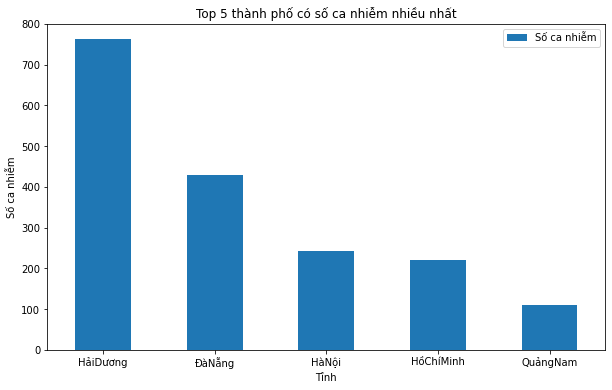

In [57]:
# trực qua hóa bằng biểu đồ cột
df_top5.plot.bar(figsize=(10,6),x='Tỉnh', y='Số ca nhiễm', rot=0)
plt.title('Top 5 thành phố có số ca nhiễm nhiều nhất')
plt.xlabel('Tỉnh')
plt.ylabel('Số ca nhiễm')
plt.show()

In [110]:
# trực quan hóa bằng biểu đồ tròn
df = df_top5.transpose()
header_row=0
df.columns = df.iloc[header_row]
df = df.iloc[1:,:]
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Tỉnh'})
df= df.groupby('Tỉnh').sum()
df
# df_top5.plot.pie(figsize=(10,6),y='Số ca nhiễm')
# plt.title('Top 5 thành phố có số ca nhiễm nhiều nhất')
# plt.xlabel('Tỉnh')
# plt.ylabel('Số ca nhiễm')
# plt.show()

Tỉnh,HảiDương,ĐàNẵng,HàNội,HồChíMinh,QuảngNam
Tỉnh,,,,,
Số ca nhiễm,762,428,242,221,109


In [9]:
# top 15 thành phố có số ca nhiễm nhiều nhất
top15 = df_covid.sort_values(by='Số ca nhiễm', ascending=True)
top15.groupby(df_covid['Tỉnh'])
df_top15 = top15.iloc[-15:,[4,5]]
df_top15

,Tỉnh,Số ca nhiễm
40,GiaLai,27
55,ĐồngTháp,27
24,NinhBình,32
20,HưngYên,34
21,TháiBình,38
46,BìnhDương,42
61,BạcLiêu,52
48,BàRịa-VũngTàu,81
13,QuảngNinh,84
36,KhánhHòa,89


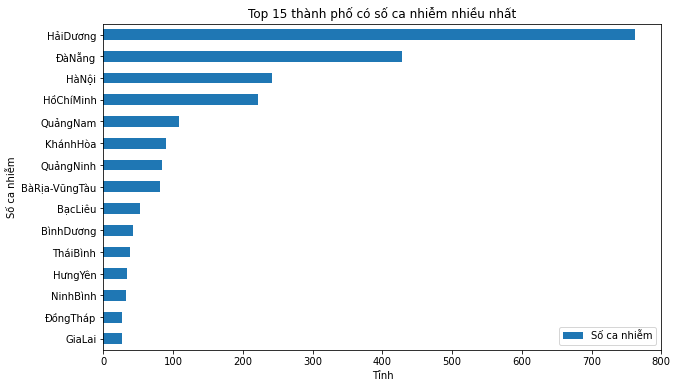

In [10]:
df_top15.plot.barh(figsize=(10,6),x='Tỉnh', y='Số ca nhiễm', rot=0)
plt.title('Top 15 thành phố có số ca nhiễm nhiều nhất')
plt.xlabel('Tỉnh')
plt.ylabel('Số ca nhiễm')
plt.show()

In [11]:
df_covid['Số ca nhiễm'].head()

0    242
1      2
2      0
3      0
4      0
Name: Số ca nhiễm, dtype: int64

In [12]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_covid['Số ca nhiễm'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[55  4  1  1  0  1  0  0  0  1]
[  0.   76.2 152.4 228.6 304.8 381.  457.2 533.4 609.6 685.8 762. ]


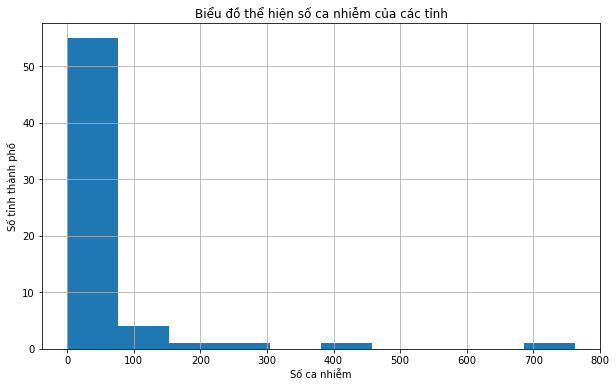

In [13]:
# Biểu đồ histogram tần suất các ca nhiễm của các tỉnh
df_covid['Số ca nhiễm'].plot(kind='hist',figsize=(10,6))
plt.grid()
plt.title("Biểu đồ thể hiện số ca nhiễm của các tỉnh")
plt.xlabel("Số ca nhiễm")
plt.ylabel("Số tỉnh thành phố")
plt.show()

In [14]:
df_line = df_covid.iloc[:,[5,8]]
df_line

,Số ca nhiễm,Tử vong
0,242,0
1,2,0
2,0,0
3,0,0
4,0,0
...,...,...
58,10,0
59,0,0
60,0,0
61,52,0


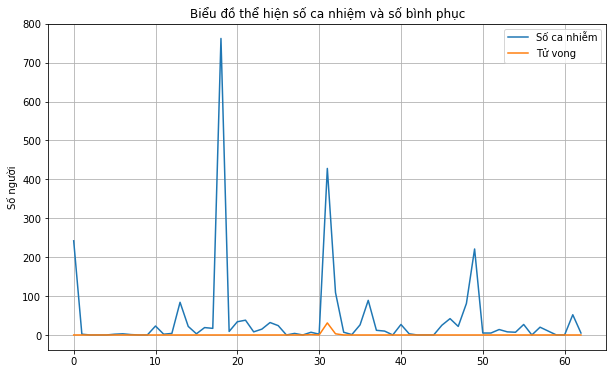

In [15]:
# biểu đồ line thể hiện xu hương của số ca nhiễm và số bình phục
df_line.plot.line(figsize=(10,6))
plt.grid()
plt.title("Biểu đồ thể hiện số ca nhiệm và số bình phục")
plt.xlabel("")
plt.ylabel("Số người")
plt.show()